In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa
import os
import glob
from PIL import Image
import xlrd #para leer
from xlrd import open_workbook
from keras.models import model_from_json

Using TensorFlow backend.
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
def cantidad_img():
    cantidad=len(glob.glob("C:/Users/ASUS/Desktop/Proyecto Carrito/imagenes/*.jpg"))
    return cantidad

def get_name_img(index):
    book = xlrd.open_workbook("C:/Users/ASUS/Desktop/Proyecto Carrito/excelente/excel.xlsx")
    sh = book.sheet_by_index(0)
    nombre = sh.cell_value(index, 0)
    return "C:/Users/ASUS/Desktop/Proyecto Carrito/imagenes/" + nombre

'''
def img_preprocess(img):
    #img = np.float32(img)
    #img = np.uint8(img)
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #img = cv2.GaussianBlur(img, (3, 3), 0) #this function helps smoothing the image out and to reduce noise within the image
    #img = cv2.resize(img, (200, 66)) #we expand the image
    #img = img.reshape(66, 200, 1)
    #img = img/255 #normaize the image
    img = canny(img)
    lines = cv2.HoughLinesP(img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=30)
    img = display_lines(img, lines)
    img = region_of_interest(img)
    img = cv2.resize(img, (100, 100)) #we expand the image
    img = np.stack((img,)*3, axis=-1)
    img = img/255 #normaize the image
    return img
'''
def img_preprocess(img): 
    sensitivity=110
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    lower_white = np.array([0,0,255-sensitivity])
    upper_white = np.array([255,sensitivity,255])
    mask = cv2.inRange(hsv, lower_white, upper_white)
    #img = region_of_interest(mask)
    img = cv2.resize(mask, (100, 100)) #we expand the image
    img = np.stack((img,)*3, axis=-1)
    img = img/255 #normaize the image
    return img

In [3]:
def canny(image):
    #image = np.float32(image)
    #image = np.uint8(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray, (kernel, kernel), 0)
    canny = cv2.Canny(blur, 50, 150)
    #canny = canny/255 #normaize the image
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)   #we make the pixels black
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                 cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)#print(line) #coordenadas de las lineas

    return line_image

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200, height), (650, height), (650, 190), (200, 190)]], np.int32)
    #mask = np.zeros_like(image)
    cv2.fillPoly(image, polygons, 0) #0 = color black, 255 = color white
    #masked_image = cv2.bitwise_and(image, mask)
    return image
    

(100, 100, 3)


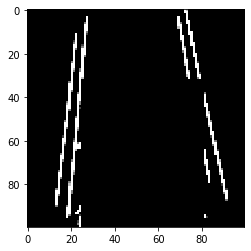

In [28]:
ruta = "C:/Users/ASUS/Desktop/Proyecto Carrito/imagenes/imagen145.jpg"
img = cv2.imread(ruta)
#plt.imshow(img)
img = canny(img)
lines = cv2.HoughLinesP(img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=30)
img = display_lines(img, lines)
img = region_of_interest(img)
img = cv2.resize(img, (100, 100)) #we expand the image
img = np.stack((img,)*3, axis=-1)
img = img/255 #normaize the image
print(img.shape)
plt.imshow(img)

(100, 100, 3)


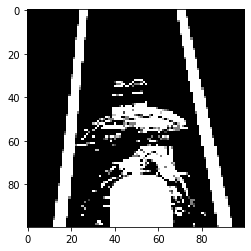

In [34]:
ruta = "C:/Users/ASUS/Desktop/Proyecto Carrito/imagenes/imagen145.jpg"
sensitivity=110
img=cv2.imread(ruta)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])
mask = cv2.inRange(hsv, lower_white, upper_white)
#img = region_of_interest(mask)
img = cv2.resize(mask, (100, 100)) #we expand the image
img = np.stack((img,)*3, axis=-1)
img = img/255 #normaize the image
print(img.shape)
plt.imshow(img)

In [4]:
def pan(image):
    pan = iaa.Affine(translate_percent= {"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

def img_random_brightness(image):
    brightness = iaa.Multiply() #multiplies all the pixel intensities, inside the image thus any pixel intensity multiplied by a value less than 1 will become darker
    image = brightness.augment_image(image)
    return image

def img_random_flip(image, steering_angle):
    image = cv2.flip(image, 1) #flip horizontal
    steering_angle = -steering_angle
    return image, steering_angle

def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3)) #30% zoom in the image
    image = zoom.augment_image(image)
    return image

def random_augment(image, steering_angle):
    image = np.float32(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    ''' 
    if np.random.rand() < 0.5:
        image = zoom(image)
        
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    '''
    return image, steering_angle

In [5]:
############### This part is only to get the images captured from the camera  #################

image_list = []
steerings = []

book = xlrd.open_workbook("C:/Users/ASUS/Desktop/Proyecto Carrito/excelente/excel.xlsx")
sh = book.sheet_by_index(0)

#image_list = glob.glob("C:/Users/ASUS/Desktop/Proyecto Carrito/imagenes/*.jpg")
direccion = 1
for i in range(0, cantidad_img()):
    cont = 121 +i
    ruta = "C:/Users/ASUS/Desktop/Proyecto Carrito/imagenes/imagen%d.jpg" %cont
    #image_list.append(Image.open(ruta))
    image_list.append(cv2.imread(ruta))
    if sh.cell_value(i, 1) == 'w':  #centro
        direccion = 0
    elif sh.cell_value(i, 1) == 'd':  #derecha
        direccion = 1
    elif sh.cell_value(i, 1) == 'a':  #izquierda
        direccion = -1
    steerings.append(direccion)
    

cantidad=len(glob.glob("C:/Users/ASUS/Desktop/Proyecto Carrito/imag/*.jpg"))
book = xlrd.open_workbook("C:/Users/ASUS/Desktop/Proyecto Carrito/exele/excel.xlsx")
sh = book.sheet_by_index(0)
for i in range(0, cantidad):
    cont = 129 +i
    ruta = "C:/Users/ASUS/Desktop/Proyecto Carrito/imag/imagen%d.jpg" %cont
    #image_list.append(Image.open(ruta))
    image_list.append(cv2.imread(ruta))
    if sh.cell_value(i, 1) == 'w':  #centro
        direccion = 0
    elif sh.cell_value(i, 1) == 'd':  #derecha
        direccion = 1
    elif sh.cell_value(i, 1) == 'a':  #izquierda
        direccion = -1
    steerings.append(direccion)
    
cantidad=len(glob.glob("C:/Users/ASUS/Desktop/Proyecto Carrito/imag2/*.jpg"))
book = xlrd.open_workbook("C:/Users/ASUS/Desktop/Proyecto Carrito/exele2/excel.xlsx")
sh = book.sheet_by_index(0)
for i in range(0, cantidad):
    cont = 80 +i
    ruta = "C:/Users/ASUS/Desktop/Proyecto Carrito/imag2/imagen%d.jpg" %cont
    #image_list.append(Image.open(ruta))
    image_list.append(cv2.imread(ruta))
    if sh.cell_value(i, 1) == 'w':  #centro
        direccion = 0
    elif sh.cell_value(i, 1) == 'd':  #derecha
        direccion = 1
    elif sh.cell_value(i, 1) == 'a':  #izquierda
        direccion = -1
    steerings.append(direccion)
    
cantidad=len(glob.glob("C:/Users/ASUS/Desktop/Proyecto Carrito/imag3/*.jpg"))
book = xlrd.open_workbook("C:/Users/ASUS/Desktop/Proyecto Carrito/exele3/excel.xlsx")
sh = book.sheet_by_index(0)
for i in range(0, cantidad):
    cont = 67 +i
    ruta = "C:/Users/ASUS/Desktop/Proyecto Carrito/imag3/imagen%d.jpg" %cont
    #image_list.append(Image.open(ruta))
    image_list.append(cv2.imread(ruta))
    if sh.cell_value(i, 1) == 'w':  #centro
        direccion = 0
    elif sh.cell_value(i, 1) == 'd':  #derecha
        direccion = 1
    elif sh.cell_value(i, 1) == 'a':  #izquierda
        direccion = -1
    steerings.append(direccion)
    
######################################################################################################

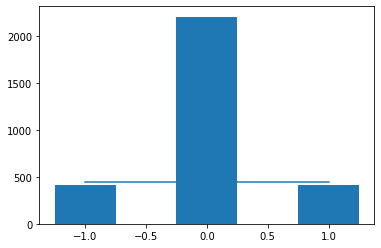

In [6]:
num_bins = 3
samples_per_bin = 450
hist, bins = np.histogram(steerings, num_bins)
center = (-1,0,1) 
plt.bar(center, hist, width = 0.5)
plt.plot((np.min(steerings), np.max(steerings)), (samples_per_bin, samples_per_bin)) 
#if we were to train our convolutional neural network based on this data then the model  could become biased towards driving straight all the time
#so we must flatten our data distribution and cut off extraneous samples for specific bins whose frecuency exceed 150

total data: 3030
remaining: 1276


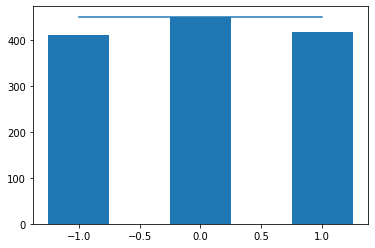

In [7]:
print('total data:', len(image_list))

stee = []
imag = []
stee2 = []
imag2 = []

list_ = list(zip(steerings, image_list))
random.shuffle(list_)
steerings, image_list = zip(*list_)

for j in range(-1, 2, 1):
    stee = []
    imag = []
    for i in range(len(steerings)):
        if steerings[i] == j:
            stee.append(steerings[i])
            imag.append(image_list[i])
    stee = stee[:samples_per_bin]
    imag = imag[:samples_per_bin]
    imag2.extend(imag)
    stee2.extend(stee)

list_ = list(zip(stee2, imag2))
random.shuffle(list_)
steerings, image_list = zip(*list_)
image_list = list(image_list)
steerings = list(steerings)

print('remaining:', len(steerings))

hist, _= np.histogram(steerings, (num_bins))
plt.bar(center, hist, width=0.5)
plt.plot((np.min(steerings), np.max(steerings)), (samples_per_bin, samples_per_bin)) 

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(image_list, steerings, test_size = 0.2, random_state = 6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1020
Valid Samples: 256


In [9]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
        batch_img = []
        batch_steering = []
    
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            
            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
      
            else:
                im = image_paths[random_index]
                steering = steering_ang[random_index]
            
            #im = img_preprocess(im)
            #im = one_chanel_to_3(random_index, im)
            batch_img.append(im)
            batch_steering.append(steering)
      
        yield (np.asarray(batch_img), np.asarray(batch_steering))  

In [10]:
X_train = np.array(list(map(img_preprocess, X_train))) 
X_valid = np.array(list(map(img_preprocess, X_valid)))#the map function will return the preprocessed images in the format of a list
#therefore we can easily use the list function to store the returned values and finaly we need to format this list as an array
#before we can store it inside of our X_train variable
#Now we have preprocessed our entire training data set

Text(0.5, 1, 'Preprocess Image')

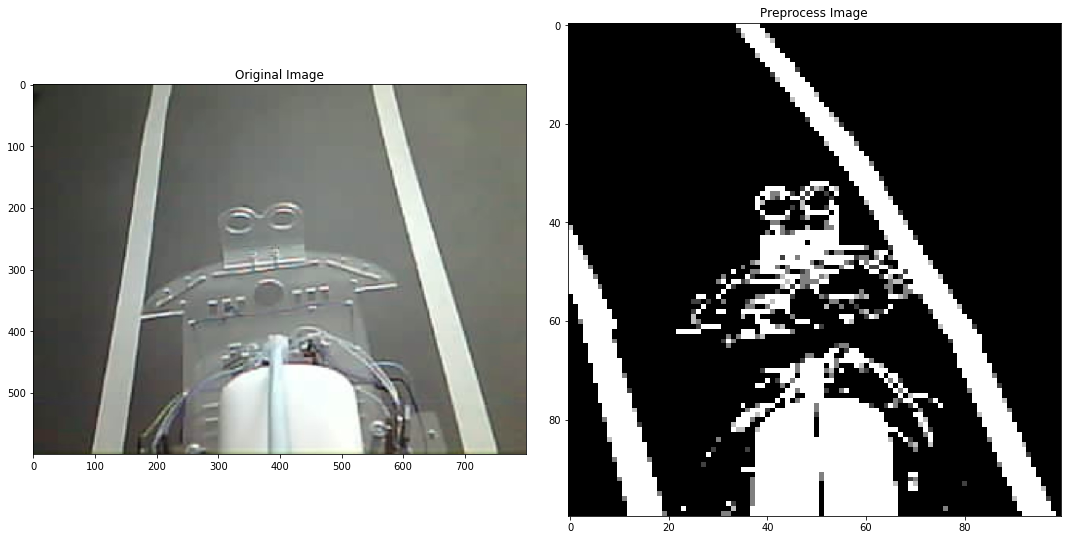

In [13]:
#we will plot an image from our X_train array to verify that we preprocessed our images correctly
'''
rand = random.randint(0, len(X_train -1))
print(X_train.shape)
print(y_train[rand])
num = rand + 121
ruta = "C:/Users/ASUS/Desktop/Proyecto Carrito/imagenes/imagen%d.jpg" %num
image = cv2.imread(ruta)
'''
ruta = "C:/Users/ASUS/Desktop/Proyecto Carrito/imagenes/imagen145.jpg"
image = cv2.imread(ruta)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(image)
axs[0].set_title('Original Image')
 
axs[1].imshow(X_train[rand])
axs[1].set_title('Preprocess Image')

In [20]:
def nvidia_model(): #we will use the structure of the nvidia model
    model = Sequential()
  #24 filters of 5x5, the stride of 2 pixels
  #the elu function always has the chance to recover and fits its weights parameters to decrease its error.
  #meaning it always remains capable of learning and contributing to the model,
  #unlike the relu which can essentially die
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(100, 100, 3), activation='elu'))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
    #model.add(Convolution2D(64, 3, 3, activation='elu')) #stride of one pixel
    #model.add(Convolution2D(64, 3, 3, activation='elu'))
    
    #we will use dropout layers to prevent overfitting. Recall that dropout layers set the input of a random fraction of nodes to zero during each update
    #this helps the model generalize the training data as it is forced to use a variaty of combinations of nodes to learn from the same data
    #model.add(Dropout(0.5)) #50% of the inputs

    model.add(Flatten())
    model.add(Dense(100, activation = 'elu'))
    #model.add(Dropout(0.5))
    model.add(Dense(50, activation = 'elu'))
    #model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'elu'))
    #model.add(Dropout(0.5))

    model.add(Dense(1))

    optimizer = Adam(lr=1e-3) #lr = 0.001
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [21]:
model = nvidia_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(100, 100,..., activation="elu", strides=(2, 2))`
  import sys
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  if __name__ == '__main__':


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 48)          43248     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3888)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               388900    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [22]:
#now we're going to train our model
#history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid), batch_size = 100, verbose = 1, shuffle = 1)
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1), 
                              steps_per_epoch=150, 
                              epochs=8,
                              validation_data=batch_generator(X_valid, y_valid, 100, 0),
                              validation_steps=150,
                              verbose=1,
                              shuffle=1) #batch size = 100, generates 100 images per step, #we will augment a total of one hundred images 300 times, so, 30,000 images

Instructions for updating:
Use tf.cast instead.
Epoch 1/8
150/150 [==============================] - 140s 934ms/step - loss: 0.2844 - val_loss: 0.1364
Epoch 2/8
150/150 [==============================] - 84s 561ms/step - loss: 0.1233 - val_loss: 0.0943
Epoch 3/8
150/150 [==============================] - 76s 508ms/step - loss: 0.0942 - val_loss: 0.0861
Epoch 4/8
150/150 [==============================] - 78s 520ms/step - loss: 0.0796 - val_loss: 0.0846
Epoch 5/8
150/150 [==============================] - 79s 523ms/step - loss: 0.0708 - val_loss: 0.0741
Epoch 6/8
150/150 [==============================] - 79s 526ms/step - loss: 0.0661 - val_loss: 0.0875
Epoch 7/8
150/150 [==============================] - 79s 529ms/step - loss: 0.0606 - val_loss: 0.1043
Epoch 8/8
150/150 [==============================] - 80s 532ms/step - loss: 0.0586 - val_loss: 0.0671


Text(0.5, 0, 'Epoch')

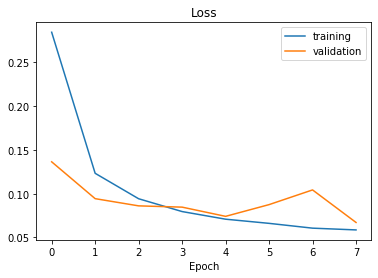

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [55]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_carrito.h5")
print("Loaded model from disk")

#model.compile(loss='mse', optimizer=optimizer)

Loaded model from disk


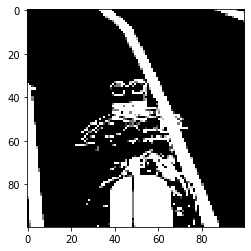

In [24]:
img = cv2.imread("C:/Users/ASUS/Desktop/Proyecto Carrito/imagenes/imagen560.jpg")
img = img_preprocess(img)
plt.imshow(img)

In [25]:
img = img.reshape(1, 100, 100, 3)
prediccion = model.predict(img)
print("predicted sign: "+ str(prediccion))
if prediccion < -0.5:
    prediccion = 'a'
elif prediccion > 0.6:
    prediccion = 'd'
else:
    prediccion = 'w'
    
print("prediccion: "+ str(prediccion))

predicted sign: [[-0.75384253]]
prediccion: a


In [26]:
model_json = model.to_json()
with open("C:/Users/ASUS/Desktop/Proyecto Carrito/modelA.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("C:/Users/ASUS/Desktop/Proyecto Carrito/model_carritoA.h5")
print("Saved model to disk")

Saved model to disk
